In [1]:
import torch
import torch.nn as nn
from torchvision import models,datasets
import numpy as np

In [35]:
class VGG19(nn.Module):
    def __init__(self):
        super(VGG19,self).__init__()
        #model architecture
        self.conv1= nn.Conv2d(3,64,3, padding=1)
        self.relu= nn.ReLU()
        self.conv2= nn.Conv2d(64,64,3,padding=1)
        self.relu= nn.ReLU()
        self.maxp1= nn.MaxPool2d(2, stride=2)#number of channels will be same
        self.relu= nn.ReLU()
        self.conv3= nn.Conv2d(64,128,3,padding=1)
        self.relu= nn.ReLU()
        self.conv4= nn.Conv2d(128,128,3,padding=1)
        self.relu= nn.ReLU()
        self.maxp2= nn.MaxPool2d(2, stride=2)
        self.relu= nn.ReLU()
        self.conv5= nn.Conv2d(128,256,3,padding=1)
        self.relu= nn.ReLU()
        self.conv6= nn.Conv2d(256, 256, 3, padding=1)
        self.relu= nn.ReLU()
        self.conv7=nn.Conv2d(256,256, 3, padding=1)
        self.relu= nn.ReLU()
        self.conv8=nn.Conv2d(256,256, 3, padding=1)
        self.maxp3= nn.MaxPool2d(2, stride=2)
        self.relu= nn.ReLU()
        self.conv9= nn.Conv2d(256, 512, 3, padding=1)
        self.relu= nn.ReLU()
        self.conv10= nn.Conv2d(512, 512, 3, padding=1)
        self.relu= nn.ReLU()
        self.conv11= nn.Conv2d(512, 512, 3, padding=1)
        self.relu= nn.ReLU()
        self.conv12= nn.Conv2d(512, 512, 3, padding=1)
        self.relu= nn.ReLU()  
        self.maxp4= nn.MaxPool2d(2, stride=2)
        self.conv13= nn.Conv2d(512, 512, 3, padding=1)
        self.relu= nn.ReLU()
        self.conv14= nn.Conv2d(512, 512, 3, padding=1)
        self.relu= nn.ReLU()
        self.conv15= nn.Conv2d(512, 512, 3, padding=1)
        self.relu= nn.ReLU()
        self.conv16= nn.Conv2d(512, 512, 3, padding=1) 
        self.relu= nn.ReLU()
        self.maxp5= nn.MaxPool2d(2, stride=2)
        self.ada= nn.AdaptiveAvgPool2d(output_size=(7, 7))
        #fc layers
        self.fc1= nn.Linear(512*7*7, 4096)
        self.relu= nn.ReLU()
        self.fc2= nn.Linear(4096, 4096)
        self.relu= nn.ReLU()
        self.fc3= nn.Linear(4096,1000)

    def forward(self, x):
        x= self.conv1(x)
        print(x.size())
        x= self.conv2(x)
        print(x.size())
        x= self.maxp1(x)
        print(x.size())
        x= self.conv3(x)
        print(x.size())
        x= self.conv4(x)
        print(x.size())
        x= self.maxp2(x)
        print(x.size())
        x= self.conv8(self.conv7(self.conv6(self.conv5(x))))
        print(x.size())
        x= self.maxp3(x)
        print(x.size())
        x= self.conv12(self.conv11(self.conv10(self.conv9(x))))
        print(x.size())
        x= self.maxp4(x)
        print(x.size())
        x= self.conv16(self.conv15(self.conv14(self.conv13(x))))
        print(x.size())
        x= self.maxp5(x)
        print(x.size())
        # print(x.view(1, -1).size())
        print('adad', self.ada(x).size())
        x= self.fc1(x.view(1, -1))
        print(x.size())
        x= self.fc2(x)
        print(x.size())
        x= self.fc3(x)
        print(x.size())




In [36]:
img= torch.randn(1,3,224,224)
net= VGG19()
net(img) 

torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 7, 7])
adad torch.Size([1, 512, 7, 7])
torch.Size([1, 4096])
torch.Size([1, 4096])
torch.Size([1, 1000])


In [31]:
net

VGG19(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu): ReLU()
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxp2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxp3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv9): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv10): C

In [32]:
models.vgg19(pretrained=False)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [3]:
class VGG( nn.Module): ##VGG19s
    def __init__(self):
        super(VGG, self).__init__()
        self.ConvLayers =  nn.Sequential(
             nn.Conv2d(3,64,3, padding=1),
             nn.ReLU(),
             nn.Conv2d(64,64,3,padding=1),
             nn.ReLU(),
             nn.MaxPool2d(2, stride=2),#number of channels will be same
             nn.ReLU(),
             nn.Conv2d(64,128,3,padding=1),
             nn.ReLU(),
             nn.Conv2d(128,128,3,padding=1),
             nn.ReLU(),
             nn.MaxPool2d(2, stride=2),
             nn.ReLU(),
             nn.Conv2d(128,256,3,padding=1),
             nn.ReLU(),
             nn.Conv2d(256, 256, 3, padding=1),
             nn.ReLU(),
             nn.Conv2d(256,256, 3, padding=1),
             nn.ReLU(),
             nn.Conv2d(256,256, 3, padding=1),
             nn.MaxPool2d(2, stride=2),
             nn.ReLU(),
             nn.Conv2d(256, 512, 3, padding=1),
             nn.ReLU(),
             nn.Conv2d(512, 512, 3, padding=1),
             nn.ReLU(),
             nn.Conv2d(512, 512, 3, padding=1),
             nn.ReLU(),
             nn.Conv2d(512, 512, 3, padding=1),
             nn.ReLU(),  
             nn.MaxPool2d(2, stride=2),
             nn.Conv2d(512, 512, 3, padding=1),
             nn.ReLU(),
             nn.Conv2d(512, 512, 3, padding=1),
             nn.ReLU(),
             nn.Conv2d(512, 512, 3, padding=1),
             nn.ReLU(),
             nn.Conv2d(512, 512, 3, padding=1), 
             nn.ReLU(),
             nn.MaxPool2d(2, stride=2)       )
        
        self.Adap= nn.AdaptiveAvgPool2d(output_size=(7, 7))
        
        self.DenseLayer= nn.Sequential(
            nn.Linear(512*7*7, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(4096,1000),
        )

    def forward(self,x):
        x= self.ConvLayers(x)
        #print(x.size())
        #x= self.Adap(x)
        x= x.view(-1,512*7*7)
        x= self.DenseLayer(x)
        return x

    

In [4]:
new_net= VGG()
new_net= new_net.to("cuda")

In [100]:
img1= torch.randn(2,3,224,224)
out= new_net(img1)

In [101]:
out

tensor([[-0.0104, -0.0010,  0.0077,  ..., -0.0150, -0.0053,  0.0136],
        [-0.0108, -0.0016,  0.0037,  ..., -0.0087,  0.0004,  0.0083]],
       grad_fn=<AddmmBackward>)

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms

In [6]:
transform = transforms.Compose(
    [transforms.Resize(224),
     transforms.ToTensor(),
     
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
     ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


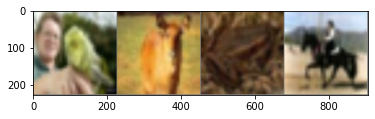

 bird  deer  frog horse


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(new_net.parameters(), lr=0.001, momentum=0.9)

In [11]:
from tqdm import tqdm_notebook

In [14]:
from tqdm import tqdm


In [15]:
??tqdm

In [16]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in tqdm_notebook(enumerate(trainloader, 0), total= len(trainloader.dataset)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels= inputs.to("cuda"), labels.to("cuda")

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        #print(inputs.size())
        outputs = new_net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


KeyboardInterrupt: ignored

In [88]:
import torch.nn.functional as F